In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2 as cv2
import numpy as np
import os
from google.colab import drive
drive.mount('/content/gdrive')
data_path = "/content/gdrive/My Drive/vision/captcha"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
from keras.models import load_model
from imutils import paths
import numpy as np
import imutils
import cv2
import pickle

img is found


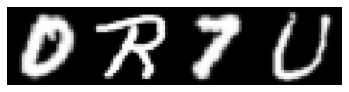

In [46]:
data_path = "/content/gdrive/My Drive/vision/captcha"
img = cv2.imread(os.path.join(data_path,'ch3.png'),cv2.IMREAD_COLOR)
if(img is None):
  print("No img is found")
else:
  print("img is found")
  plt.axis("off")
  plt.imshow(img)
  plt.show()


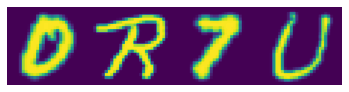

In [47]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(img_gray)
plt.show()

In [48]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/vision/captcha/model/letter_num_cf.h5')

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 5)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 845)               0         
                                                                 
 dense (Dense)               (None, 1024)              866304    
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                        

In [50]:
ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

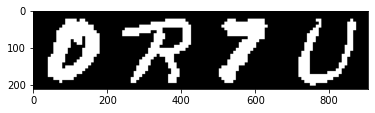

In [51]:
plt.imshow(thresh, cmap = 'gray')
plt.show()

In [52]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [53]:
import string
string.ascii_lowercase
string.ascii_uppercase
cha =['0','1','2','3','4','5','6','7','8','9']
for i in string.ascii_uppercase:
    cha.append(i)
for i in string.ascii_lowercase:
    cha.append(i)

[30]
U


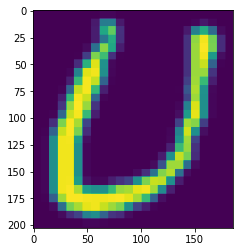

[7]
7


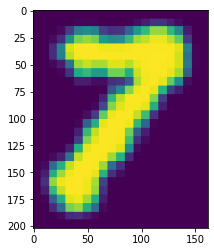

[27]
R


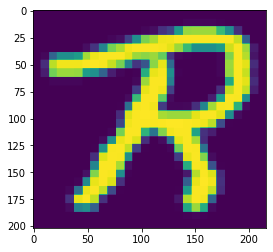

[11]
B


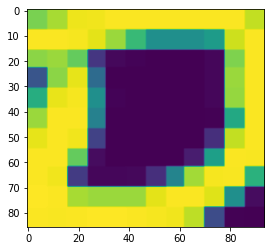

[0]
0


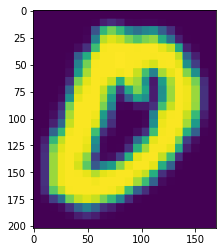

[42]
g


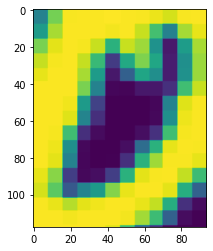

6

In [54]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    if (cv2.contourArea(cntr) >= 2000):
        x,y,w,h = cv2.boundingRect(cntr)
        crop_img = img[y-15:y+h+15, x-15:x+w+15]
        
        # crop_img = thresh[y:y+h, x:x+w]
        
        crop_img = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
        im_F = np.array(crop_img)
        im_F = cv2.resize(im_F,(28,28))
        im_F = np.reshape(im_F,[1,28,28,1])
        im_F = im_F/255.
        Y_pred = model.predict(im_F)
        y_pred = np.argmax(Y_pred, axis=1)
        print(y_pred)
        print(cha[y_pred[0]])
        plt.imshow(crop_img)
        plt.show()
        

for i,cntr in enumerate(contours):
    if (cv2.contourArea(cntr) >= 2000):
        x,y,w,h = cv2.boundingRect(cntr)
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

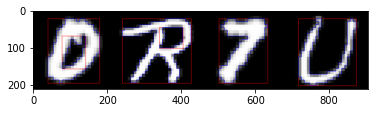

In [55]:
dmy = img.copy()

cv2.drawContours(dmy, valid_cntrs, -1, (0,0,255), 1)
plt.imshow(dmy)
plt.show()